# Data Wrangling project
#### In this notebook, I'll gather, assess and clean 3 datasets related to tweets information from WeRateDogs twitter account. 

#### Dataset used on this notebook:

##### df_tweets: dataframe with tweet collection provided
##### df_pred: dataframe with image predictions from the pictures of dogs of the tweets stored in df_tweets
##### df_json: additional information of df_tweets, like favorite counts and retweets

##### I split the code in 3 sections: Gather, Assess and Clean.

#### Import libraries and initiate some variables

In [742]:
import pandas as pd
import json
import requests
from urllib.request import Request, urlopen
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# get by requests https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300

import tweepy

# Credentials for tweepy, actually has been replaced with dummy text

consumer_key = '<YOUR_CONSUMER_KEY>'
consumer_secret = '<YOUR_CONSUMER_SECRET>'
access_token = '<YOUR_ACCESS_TOKEN>'
access_secret = '<YOUR_ACCESS_SECRET>'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)


## 1. Gather information process

In [785]:
# Get data of tweets from WeRateDogs, using a local file
df_tweets = pd.read_csv("twitter-archive-enhanced.csv")
#display(df_tweets)
#display(df_tweets.info())
#display(df_tweets.shape)

In [780]:
# Get data of image predictions from WeRateDogs

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url).text
#print (response.content)
df_pred = pd.read_csv(StringIO(response), sep = "\t")
#display(df_pred)
#display(df_pred.info())
#display(df_pred.shape)

In [ ]:
#tweet = api.get_status(892420643555336193)
#print (tweet.text.encode('UTF-8'))

# Get data from API implementation, I have coded but will continue with a local version
# of tweet_json.txt because of Internet speed problems

def get_data_from_api():
    fails_dict = {}
    with open('tweets_json_ext.txt', 'w') as file_output:
        for tweet_id in tweet_ids:
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, file_output)
                file_output.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass  
    print(fails_dict) 
#get_data_from_api()    

In [ ]:
# Get json additional data from tweets

data_temp = []
with open ("tweet-json.txt") as file:
    for line in file:
        data_temp.append(json.loads(line))
df_json = pd.DataFrame(data_temp)        

#display(df_json.head())
#display(df_json.info())
#display(df_json.shape)

## 2. Asssess process

### Assess WeRateDogs tweets dataset

In [ ]:
df_tweets.head()

In [ ]:
df_tweets.info()

In [ ]:
df_tweets.describe()

In [ ]:
# Check ids column

display ( df_tweets.tweet_id.value_counts().sort_values() )
display ( df_tweets.in_reply_to_status_id.value_counts() )
display ( df_tweets.retweeted_status_id.value_counts() )

In [ ]:
# Check values for rating_numerator and rating_denominator

display (df_tweets.rating_numerator.value_counts().sort_index())
display (df_tweets.rating_denominator.value_counts().sort_index())

In [ ]:
# Check values for source platform

df_tweets.source.value_counts()

In [ ]:
# Check dog names and dog stages

names = df_tweets.name.sort_values()
def show_names():
    for name in names:
        print (name)
#show_names()
doggo = df_tweets.doggo.value_counts()
print(doggo)

floofer = df_tweets.floofer.value_counts()
print(floofer)

pupper = df_tweets.pupper.value_counts()
print(pupper)

puppo = df_tweets.puppo.value_counts()
print(puppo) 

### Assess additional data

In [536]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [537]:
#Check column id duplicates
data_1 = df_json.id.values.astype("int64")
data_2 = df_json.id_str.values.astype("int64")

print (data_1.shape)
print (data_2.shape)


id_serie = pd.Series(data_1)
id_str_serie = pd.Series(data_2)

compare = id_serie == id_str_serie
print (compare.value_counts())

(2354,)
(2354,)
True    2354
dtype: int64


In [534]:
#Check "user" column values
#print (df_json.user.value_counts())
data_users = []
users =  df_json.user.values
for user in users:
    data_users.append ( user["screen_name"] )

df_users = pd.DataFrame(data_users, columns=['screenname'])
df_users.screenname.value_counts()

dog_rates    2354
Name: screenname, dtype: int64

In [535]:
#Check other columns values

print (df_json.truncated.value_counts())
print (df_json.source.value_counts())
print (df_json.in_reply_to_status_id.value_counts())
print (df_json.in_reply_to_status_id_str.value_counts())
print (df_json.in_reply_to_user_id_str.value_counts())
print (df_json.in_reply_to_user_id_str.value_counts())


False    2354
Name: truncated, dtype: int64
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64
6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64
667152164079423490    2
692041934689402880    1
811627233043480576    1
696488710901260288    1
857156678055342080    1
                     ..
855858535607001088    1
886266357075128321    1
826598365270007810    1
675497103322386432    1
674752233200820224    1
Name: in_reply_to_status_id_str, Length: 77, 

### Assess image predictions dataset

In [ ]:
display (df_pred)
display (df_pred.info())

In [ ]:
df_pred.describe()

In [ ]:
#Check for img_num values
df_pred.img_num.value_counts()

In [ ]:
#Check for real values on "p1_conf" column
df_pred.p1_conf.astype("float16").value_counts().sort_index()

In [ ]:
#Check for real values on "p2_conf" column
df_pred.p2_conf.astype("float16").value_counts().sort_index()

In [ ]:
#Check for real values on "p3_conf" column
df_pred.p3_conf.astype("float16").value_counts().sort_index()

In [ ]:
#Check for dog type values
display(df_pred.p1.value_counts())
display(df_pred.p2.value_counts())
display(df_pred.p3.value_counts())

In [ ]:
df_pred.p1_dog.value_counts()

In [ ]:
df_pred.p2_dog.value_counts()

In [ ]:
df_pred.p2_dog.value_counts()

## Assessment notes
### Dataset from WeRateDogs:
##### - "in_reply_to_status_id" and "in_reply_to_user_id" are float numbers, it should be integers, and beside that, the column is almost NaN, so we must get rid of it
##### - "retweeted_status_user_id" has float values, should be integer
##### - "retweeted_status_user_id" has float values, should be integer
##### - "source" column has html code on it, it should be cleaned to get only the name of the platform source from where the tweet has posted
##### - There are some dog names in "name" column, like "a", "the", "None", those are not real names of a dog, must replace them for null value
### Dataset from image predictions:
##### - The prediction dataset variable, "img_num", has values beyond the 3rd image prediction (value of 4). It will fixed using the confidence columns provided.
### Dataset from additional information:
##### - Additional data from tweets shows duplicated column ID, "id" and "id_str" are the same
##### - User column has many information, but the username is always the same, will not be useful
##### - Columns "geo", "coordinates", "place", "contributors" doesn't have values, will eliminate them

## Tidiness 

##### - Tweets and favorite and retweet counts are in separated tables
##### - Dog stage from predictions dataset, are defined in rows and columns
##### - Image prediction is defined in "img_num" column, but real value is stored in columns "p1,"p2" or "p3", according to value stored in "img_num"

## Clean process

In [786]:
# First step, make a copy of all 3 dataset
df_tweets_copy = df_tweets.copy()
df_pred_copy = df_pred.copy()
df_json_copy = df_json.copy()

### Define how to clean the data

##### - Selecting columns that could be useful for visualize or analyze
##### - Clean "source" column, deleting all the html code, leaving only the name, with a simple replace, there only 4 values, so we can make this by visual inspecting

In [ ]:
#Columns from df_tweets 
"""
 0   tweet_id
 1   in_reply_to_status_id 
 2   in_reply_to_user_id 
 3   timestamp 
 4   source 
 5   text 
 6   retweeted_status_id 
 7   retweeted_status_user_id  
 8   retweeted_status_timestamp
 9   expanded_urls 
 10  rating_numerator
 11  rating_denominator
 12  name
 13  doggo 
 14  floofer
 15  pupper
 16  puppo
 """

In [787]:
rename_columns = {"tweet_id" : "id"}
df_tweets.rename (columns = rename_columns, inplace = True)
df_tweets.head()

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [788]:
# Tidy up dog stage, move dog stage from 4 columns, to a new column named "dog_stage"
def tidy_dog_stage(df):
    real_stg = ''
    if df.doggo != "None":
        real_stg = df.doggo
    if df.floofer != "None":
        real_stg = df.floofer
    if df.pupper != "None":
        real_stg = df.pupper
    if df.puppo != "None":
        real_stg = df.puppo 
        
    if real_stg == '':
        real_stg = 'None'
    return real_stg

df_tweets["dog_stage"] = df_tweets.apply(tidy_dog_stage, axis=1)


In [789]:
df_tweets.dog_stage.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64

##### Now will view the dog stages through visualization

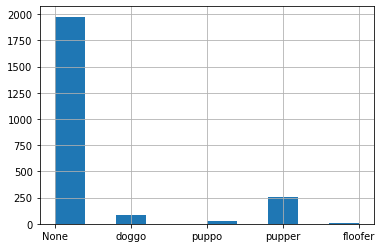

In [790]:
df_tweets.dog_stage.hist();

##### There ir still a lot of None values, but now at least we can obtain this information from one column only

##### Now will clean "source" column, replacing text of platform source, for a set of new ones

In [719]:
#Check how it is now
df_tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Will use actual values to replace for new ones, we have so few of them, so a simple replace will be fine

In [791]:
def clean_source_column(value):
    new_value = ''
    if value == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        new_value = 'Twitter for iPhone'
    if value ==  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' :
        new_value = 'Vine'
    if value == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        new_value = 'Twitter Web Client'
    if value == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        new_value = 'TweetDeck'
    return new_value

df_tweets["source"] = df_tweets["source"].apply(clean_source_column)

##### Now will check that changes has the desired effect

In [792]:
df_tweets.head()

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [793]:
df_tweets.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [723]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [794]:
df_tweets["date"] = pd.to_datetime(df_tweets.timestamp)
df_tweets.date = df_tweets.date.dt.strftime("%Y/%m/%d")

In [784]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017/08/01
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017/08/01
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017/07/31
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017/07/30
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017/07/29


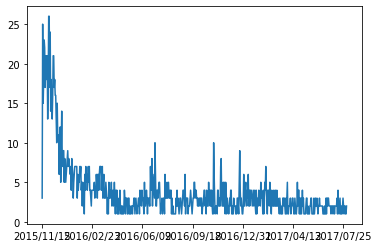

In [795]:
dates = df_tweets.date.value_counts().sort_index()
dates.plot()

In [796]:
def calculate_rate(df):
    if df.rating_denominator > 0:
        rate = df.rating_numerator / df.rating_denominator
    else:
        rate = 0
    return rate
df_tweets["rate"] = df_tweets.apply(calculate_rate, axis=1)

In [797]:
df_tweets.rate.value_counts().sort_index()

0.000000        3
0.100000        8
0.200000       11
0.300000       19
0.400000       15
0.500000       38
0.600000       32
0.636364        1
0.700000       54
0.733333        1
0.800000      102
0.818182        2
0.900000      157
1.000000      463
1.100000      469
1.200000      562
1.250000        1
1.300000      351
1.400000       54
1.500000        2
1.700000        1
2.600000        1
2.700000        1
3.428571        1
7.500000        2
18.200000       1
42.000000       2
66.600000       1
177.600000      1
Name: rate, dtype: int64

In [731]:
df_tweets.head(50)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,date,rate
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None,17/08/01,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None,17/08/01,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None,17/07/31,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None,17/07/30,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None,17/07/29,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None,17/07/29,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,None,17/07/28,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,None,17/07/28,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,None,17/07/27,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo,17/07/26,1.4


In [798]:
#Select only the relevant ones
df_tweets = df_tweets[[
        "id",
        "date",
        "source",
        "rating_numerator",
        "rating_denominator",
        "rate",
        "name",
        "dog_stage"
]]
df_tweets

,id,date,source,rating_numerator,rating_denominator,rate,name,dog_stage
0,892420643555336193,2017/08/01,Twitter for iPhone,13,10,1.3,Phineas,None
1,892177421306343426,2017/08/01,Twitter for iPhone,13,10,1.3,Tilly,None
2,891815181378084864,2017/07/31,Twitter for iPhone,12,10,1.2,Archie,None
3,891689557279858688,2017/07/30,Twitter for iPhone,13,10,1.3,Darla,None
4,891327558926688256,2017/07/29,Twitter for iPhone,12,10,1.2,Franklin,None
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015/11/16,Twitter for iPhone,5,10,0.5,None,None
2352,666044226329800704,2015/11/16,Twitter for iPhone,6,10,0.6,a,None
2353,666033412701032449,2015/11/15,Twitter for iPhone,9,10,0.9,a,None
2354,666029285002620928,2015/11/15,Twitter for iPhone,7,10,0.7,a,None


## Clean and tidy complement dataset, the one with favorite and retweet counts

 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     object 
 13  in_reply_to_screen_name        78 non-null     object 
 14  user                           2354 non-null   object 
 15  geo                            0 non-null      object 
 16  coordinates                    0 non-null      object 
 17  place                          1 non-null      object 
 18  contributors                   0 non-null      object 
 19  is_quote_status                2354 non-null   bool   
 20  retweet_count                  2354 non-null   int64  
 21  favorite_count                 2354 non-null   int64  
 22  favorited                      2354 non-null   bool   
 23  retweeted                      2354 non-null   bool   
 24  possibly_sensitive             2211 non-null   object 
 25  possibly_sensitive_appealable  2211 non-null   object 
 26  lang                           2354 non-null   object 
 27  retweeted_status               179 non-null    object 
 28  quoted_status_id               29 non-null     float64
 29  quoted_status_id_str           29 non-null     object 
 30  quoted_status                  28 non-null     object 

In [579]:
df_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [580]:
df_json = df_json[["id","favorite_count","retweet_count"]]
df_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [581]:
df_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### - Now will merge both dataframes

In [799]:
df_clean = pd.merge(left = df_tweets, right = df_json, left_on = "id", right_on = "id")

In [734]:
df_clean

,id,date,source,rating_numerator,rating_denominator,rate,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,17/08/01,Twitter for iPhone,13,10,1.3,Phineas,None,39467,8853
1,892177421306343426,17/08/01,Twitter for iPhone,13,10,1.3,Tilly,None,33819,6514
2,891815181378084864,17/07/31,Twitter for iPhone,12,10,1.2,Archie,None,25461,4328
3,891689557279858688,17/07/30,Twitter for iPhone,13,10,1.3,Darla,None,42908,8964
4,891327558926688256,17/07/29,Twitter for iPhone,12,10,1.2,Franklin,None,41048,9774
...,...,...,...,...,...,...,...,...,...,...
2349,666049248165822465,15/11/16,Twitter for iPhone,5,10,0.5,None,None,111,41
2350,666044226329800704,15/11/16,Twitter for iPhone,6,10,0.6,a,None,311,147
2351,666033412701032449,15/11/15,Twitter for iPhone,9,10,0.9,a,None,128,47
2352,666029285002620928,15/11/15,Twitter for iPhone,7,10,0.7,a,None,132,48


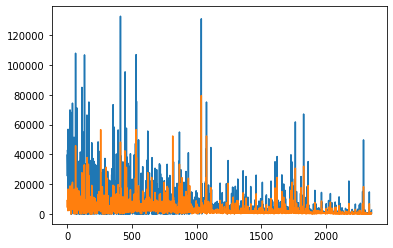

In [735]:
df_clean.favorite_count.plot()
df_clean.retweet_count.plot()

## Clean and tidy image predictions dataset

In [736]:
df_pred.head(10)

,id,image,predicted_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,WELSH_SPRINGER_SPANIEL
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,REDBONE
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,GERMAN_SHEPHERD
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,RHODESIAN_RIDGEBACK
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,MINIATURE_PINSCHER
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,BERNESE_MOUNTAIN_DOG
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,BOX_TURTLE
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,CHOW
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,SHOPPING_CART
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,MINIATURE_POODLE


In [801]:
#Rename some columns
columns = {"tweet_id": "id", "jpg_url": "image"}
df_pred = df_pred.rename(columns, axis = 1)
df_pred

,id,image,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Now will use "img_num" information to create a new one, and only dog prediction column, and get rid of p1,p2,p3 and confidence columns

In [802]:
def get_predicted_dog(df):
    predicted = ""
    if df.img_num == 1:
        predicted = df.p1
    if df.img_num == 2:
        predicted = df.p2
    if df.img_num == 3:
        predicted = df.p3    
    return predicted.upper()
    
df_pred["predicted_dog"] = df_pred.apply(get_predicted_dog, axis = 1)

In [803]:
df_pred

,id,image,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,WELSH_SPRINGER_SPANIEL
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,REDBONE
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,GERMAN_SHEPHERD
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,RHODESIAN_RIDGEBACK
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,MINIATURE_PINSCHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,ENGLISH_SPRINGER
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,PAPER_TOWEL
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,CHIHUAHUA
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,CHIHUAHUA


### Keep only the useful columns

In [804]:
df_pred = df_pred[["id", "image", "predicted_dog"]]
df_pred.head(100)

,id,image,predicted_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,WELSH_SPRINGER_SPANIEL
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,REDBONE
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,GERMAN_SHEPHERD
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,RHODESIAN_RIDGEBACK
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,MINIATURE_PINSCHER
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,BERNESE_MOUNTAIN_DOG
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,BOX_TURTLE
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,CHOW
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,SHOPPING_CART
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,MINIATURE_POODLE


### Merge the last dataframe to the cleaned df in the previous step, this will add the possible dog breed to the tweets database

In [805]:
df_clean = pd.merge(how = "left", left = df_clean, right = df_pred, left_on = "id", right_on = "id")

In [806]:
df_clean.head(30)

,id,date,source,rating_numerator,rating_denominator,rate,name,dog_stage,favorite_count,retweet_count,image,predicted_dog
0,892420643555336193,2017/08/01,Twitter for iPhone,13,10,1.3,Phineas,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,ORANGE
1,892177421306343426,2017/08/01,Twitter for iPhone,13,10,1.3,Tilly,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,CHIHUAHUA
2,891815181378084864,2017/07/31,Twitter for iPhone,12,10,1.2,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,CHIHUAHUA
3,891689557279858688,2017/07/30,Twitter for iPhone,13,10,1.3,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,PAPER_TOWEL
4,891327558926688256,2017/07/29,Twitter for iPhone,12,10,1.2,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,ENGLISH_SPRINGER
5,891087950875897856,2017/07/29,Twitter for iPhone,13,10,1.3,None,None,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,CHESAPEAKE_BAY_RETRIEVER
6,890971913173991426,2017/07/28,Twitter for iPhone,13,10,1.3,Jax,None,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,APPENZELLER
7,890729181411237888,2017/07/28,Twitter for iPhone,13,10,1.3,None,None,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,ESKIMO_DOG
8,890609185150312448,2017/07/27,Twitter for iPhone,13,10,1.3,Zoey,None,28226,4429,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,IRISH_TERRIER
9,890240255349198849,2017/07/26,Twitter for iPhone,14,10,1.4,Cassie,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,PEMBROKE


### Now will test if the new dataframe is ready to analyze

In [739]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2354 non-null   int64  
 1   date                2354 non-null   object 
 2   source              2354 non-null   object 
 3   rating_numerator    2354 non-null   int64  
 4   rating_denominator  2354 non-null   int64  
 5   rate                2354 non-null   float64
 6   name                2354 non-null   object 
 7   dog_stage           2354 non-null   object 
 8   favorite_count      2354 non-null   int64  
 9   retweet_count       2354 non-null   int64  
 10  image               2073 non-null   object 
 11  predicted_dog       2073 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 239.1+ KB


In [740]:
df_clean.describe()

,id,rating_numerator,rating_denominator,rate,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.00000,2354.000000,2354.000000,2354.000000
mean,7.426978e+17,13.127018,10.45582,1.221489,8080.968564,3164.797366
std,6.852812e+16,45.896135,6.74809,4.084430,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6.783975e+17,10.000000,10.00000,1.000000,1415.000000,624.500000
50%,7.194596e+17,11.000000,10.00000,1.100000,3603.500000,1473.500000
75%,7.993058e+17,12.000000,10.00000,1.200000,10122.250000,3652.000000
max,8.924206e+17,1776.000000,170.00000,177.600000,132810.000000,79515.000000


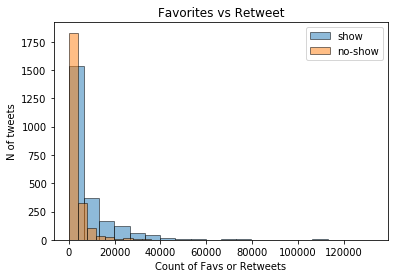

In [747]:
fig, ax = plt.subplots()
ax.hist(df_clean.favorite_count, bins = 20, alpha = 0.5, label="show", edgecolor='black')
ax.hist(df_clean.retweet_count, bins = 20, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Favorites vs Retweet")
ax.set_xlabel("Count of Favs or Retweets")
ax.set_ylabel("N of tweets")
plt.legend();

In [753]:
coeff = df_clean['favorite_count'].corr(df_clean['retweet_count'])
print ("The Pearson coefficient of correlation between Favorites and Retweet is {}".format(coeff))

The Pearson coefficient of correlation between Favorites and Retweet is 0.7028813596145035


In [762]:
df_sorted_favs = df_clean.sort_values(by=['favorite_count'], ascending = False)
display (df_sorted_favs.head(5))
display (df_sorted_favs.tail(5))

,id,date,source,rating_numerator,rating_denominator,rate,name,dog_stage,favorite_count,retweet_count,image,predicted_dog
412,822872901745569793,17/01/21,Twitter for iPhone,13,10,1.3,None,puppo,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,LAKELAND_TERRIER
1037,744234799360020481,16/06/18,Twitter for iPhone,13,10,1.3,None,doggo,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,LABRADOR_RETRIEVER
65,879415818425184262,17/06/26,Twitter for iPhone,13,10,1.3,Duddles,None,107956,45849,https://pbs.twimg.com/ext_tw_video_thumb/87941...,ENGLISH_SPRINGER
533,807106840509214720,16/12/09,Twitter for iPhone,13,10,1.3,Stephan,None,107015,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,CHIHUAHUA
134,866450705531457537,17/05/22,Twitter for iPhone,13,10,1.3,Jamesy,pupper,106827,32883,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,BOSTON_BULL


,id,date,source,rating_numerator,rating_denominator,rate,name,dog_stage,favorite_count,retweet_count,image,predicted_dog
883,760153949710192640,16/08/01,Twitter for iPhone,11,10,1.1,None,None,0,38,NaN,NaN
478,815745968457060357,17/01/02,Twitter for iPhone,12,10,1.2,Levi,None,0,4797,NaN,NaN
475,816014286006976512,17/01/02,Twitter for iPhone,11,10,1.1,Larry,None,0,6154,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,ENGLISH_SETTER
474,816062466425819140,17/01/02,Twitter for iPhone,11,10,1.1,Jack,None,0,1207,NaN,NaN
866,761750502866649088,16/08/06,Twitter for iPhone,10,10,1.0,None,None,0,4535,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,GOLDEN_RETRIEVER


In [778]:
top_10_favs = df_sorted_favs.iloc[0:11]
top_10_favs.predicted_dog

412       LAKELAND_TERRIER
1037    LABRADOR_RETRIEVER
65        ENGLISH_SPRINGER
533              CHIHUAHUA
134            BOSTON_BULL
448        STANDARD_POODLE
114       GOLDEN_RETRIEVER
536            HOUSE_FINCH
168                 ANGORA
1077            ESKIMO_DOG
41                     NaN
Name: predicted_dog, dtype: object

### Export dataframe cleaned and tidy to csv file

In [807]:
df_clean.to_csv('df_clean.csv', header=True, index=False, sep='\t', mode='w')